# Étude de cas Evaneos
### ( Évaluation de la pertinence d'un A/B test )
-----------------------------------------------

<h2><u> Contexte :</h2>
<div align="justify">
        <p>Après avoir réalisé deux versions d'un même site web, l'une étant la version originale (A) du site et l'autre une version implémentant une nouvelle fonctionnalité (B), nous cherchons à déterminer l'efficacité de la nouvelle fonctionnalité.</p>
        <p>Une version sera considérée plus efficace que l'autre si le taux de conversion y est supérieur, <em> i.e </em> <strong>ratio</strong> entre le nombre de sessions ouvertes sur le site et le nombre de devis demandés.</p>
    <p> Après 1 mois d'essai, les résultats de l'étude sont les suivants : </p>
    <ul>
        <li> La version A a eu 4000 sessions et 200 conversions (taux de conversion de <strong>5%</strong>).</li>
        <li> La version B a eu 4000 sessions et 260 conversions (taux de conversion de <strong>6.5%</strong>). </li>

</div> 

<h2><u> Question : </u></h2>
<div align="justify">
    <p> Ce résultat est-il statistiquement significatif , <em>i.e</em> la différence constatée entre les deux versions est-elle uniquement due à la nouvelle fonctionnalité ?</p>
</div>

----------------------

<h2> Qu'est-ce qu'un test A/B ?</h2>
<div align="justify">
    <p> Un test A/B est un type de test permettant de comparer l'efficacité de deux versions d'un même site quant à la réalisation d'un objectif (ici augmenter le taux de conversion). Dans notre cas nous avons nos deux versions du site : la version <strong>A</strong> (originale) et la version <strong>B</strong> (implémentant la nouvelle fonctionnalité). </p>
    <p> Lors d'un A/B test il faut <strong> absolument </strong> comparer les deux candidats sur la même base, <em>i.e</em> les deux versions doivent être soumises au test dans les <strong> mêmes </strong> conditions.</p>
    <p> Nos résultats montrent que le test B a de meilleurs résultats que le test A, néanmoins une éventuelle conclusion quant à son efficacité ne doit pas être trop hâtive, cela peut être dû à différents facteurs, notamment le hasard. Il faut par conséquent prouver que ces résultats sont <strong> statistiquement significatifs</strong>.</p>
</div>

--------

<h2> Étude statistique : </h2>
<div align="justify">
    <p> Comme évoqué précédemment, nous allons <strong>modéliser</strong> le mois d'essai en utilisant cette fois les statistiques de manière à confirmer ou non la pertinence des résultats obtenus. Cette méthode est essentielle car elle permettra de fournir un résultat général (en augmentant le nombre de sessions par exemple) que nous comparerons ensuite avec le résultat réel. </p>
    <p> Pour se faire nous avons besoin de créer un modèle statistique qui soit le plus proche de la réalité. Nous avons dans le cas présent, des internautes qui visitent le site et demandent un devis avec un probabilité d'approximativement <strong>7%</strong>.</p>
    <p> La <strong>loi binomiale</strong> est une modélisation mathématique se rapprochant de la réalité dans notre cas. Effectivement, celle ci représente le <strong>nombre de succès</strong> (ici demande d'un devis) que l'on obtient en réalisant des expériences <strong>identiques, aléatoires et indépendantes</strong> entre elles. Nous ferons donc l'hypothèse que chaque internaute visitant le site est indépendant des autres internautes (cela signifie que chaque utilisateur visite le site de sa propre initiative, personne ne l'a influencé à faire cela). De plus, le site étant identique pour chaque individu, les expériences utilisateurs seront donc identiques entre elles, et aléatoires car l'on ne sait pas <em> à priori </em> si l'utilisateur demandera un devis.</p>


<h3><u> Première modélisation :</u> <br /></h3> 
<div align="justify">
    <p> <strong> Hypothèses </strong> : </p>
    <ul>
        <li> La page possède <strong>5000 sessions</strong> (5000 utilisateurs indépendants).</li>
        <li> Le taux de conversion moyen du site est de <strong>7%.</strong> </li>
    </ul><br />
    <p><strong> Simulations du nombre de conversions pour 5000 sessions, avec une probabilité de conversion de 0.07 :</strong></p>
</div>


In [63]:
import matplotlib.pyplot as plt
import numpy as np

#Dans cette fonction nous utiliserons la fonction numpy.random.binomial() qui calcule directement le résultat de n expériences de bernouilli avec probabilité de succès égale à p
def simulation_np (n, p) :
    return (np.random.binomial(n,p))

#Affichage des résultats pour 5 expériences
print("Résultats de 5 simulations : \n")
somme = 0

for i in range(5):
    resultat = simulation_np(5000,0.07)
    somme += result
    print("%(result)d conversions parmis 5000 sessions" %{"result" : resultat})

#Calcul de la moyenne de nos 5 expériences
moyenne = somme / 5      
print("\nLa moyenne du nombre de conversions pour nos 5 expériences est de %(moyenne)d conversions" %{"moyenne":moyenne}) 

Résultats de 5 simulations : 

362 conversions parmis 5000 sessions
349 conversions parmis 5000 sessions
339 conversions parmis 5000 sessions
374 conversions parmis 5000 sessions
345 conversions parmis 5000 sessions

La moyenne du nombre de conversions pour nos 5 expériences est de 353 conversions


----------

In [86]:
#Code alternatif plus concis

#Résultats de nos 5 expériences :
values_ = np.random.binomial(5000,0.07,5)
print("Résultats de 5 simulations : \n")
for value in values_ : 
    print("%(result)d conversions parmis 5000 sessions" %{"result" : value})

#Moyenne de nos 5 expériences
print("\nLa moyenne du nombre de conversions pour nos 5 expériences est de %(moyenne)f conversions" %{"moyenne":np.mean(values)}) 

Résultats de 5 simulations : 

368 conversions parmis 5000 sessions
347 conversions parmis 5000 sessions
342 conversions parmis 5000 sessions
359 conversions parmis 5000 sessions
346 conversions parmis 5000 sessions

La moyenne du nombre de conversions pour nos 5 expériences est de 342.800000 conversions


-------

<div align="justify">
    <p> Nous voyons donc que le nombre de conversions varie d'une expérience à l'autre. </p>
    <p> Évidemment la moyenne que nous avons calculée n'est pas très pertinente car le nombre d'expériences réalisées n'est pas suffisamment grand. Ce résultat n'est donc pas <strong>statistiquement significatif</strong> ! </p>
    <p> Réalisons donc <strong>10 000 fois</strong> cette expérience plutôt que 5 fois et voyons ce que ça nous donne ! </p><br />
</div>
<p><strong> Représentation de la loi Binomiale pour 10 000 expériences : </strong></p>


La moyenne du nombre de conversions pour nos 10 000 expériences est de : 349.987100 conversions
La variance de notre distribution est de : 320.024134


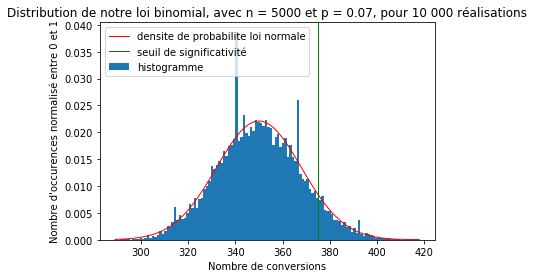


Espérance de la loi binomiale : 350.000000
Écart-type de la loi normale : 18.041619 


In [118]:
import math
import scipy.stats

#Enregistrement de nos nombres de conversions pour nos 10000 expériences
#Le troisième paramètre de random.binomial() spécifie le nombre d'expériences que nous voulons réaliser, ici 10000
valeurs = np.random.binomial(5000,0.07, 10000) 

#Calcul de la moyenne pour nos 10000 expériences
moyenne = np.mean(valeurs) 

#Calcul de la variance pour nos 10000 expériences
variance = np.var(valeurs)

#Calcul le nombre de valeurs de conversions différentes lors de la réalisation de nos 10000 expériences
nb_unique_valeurs= len(set(valeurs))

#Représentons désormais l'histogramme de nos valeurs enregistrées
#L'axe des ordonnées de notre histogramme sera normalisé, ie les valeurs prises seront entre 0 et 1
count, bins, ignored = plt.hist(valeurs, bins = nb_unique_valeurs, normed = 1, label='histogramme')
plt.title("Distribution de notre loi binomial, avec n = 5000 et p = 0.07, pour 10 000 réalisations")
plt.xlabel("Nombre de conversions")
plt.ylabel("Nombre d'occurences normalisé entre 0 et 1")

#Moyenne de notre distribution
print("\nLa moyenne du nombre de conversions pour nos 10 000 expériences est de : %(moyenne)f conversions" %{"moyenne":moyenne})

#Variance de notre distribution
print("La variance de notre distribution est de : %(variance)f" %{"variance" : variance})

#---------------------------
#Loi normale correspondante

#Calcul de l'espérance de notre loi binomiale précédente : mu = n * p
mu = 5000 * 0.07

#Calcul de l'écart type de notre loi binomiale précédente : sigma = sqrt(variance) = sqrt(n*p*(1-p))
sigma = math.sqrt(5000 * 0.07 * (1-0.07))

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1, color='r', label='densite de probabilite loi normale')
plt.axvline(x=375,color='g',label='seuil de significativité', linewidth = 1)
plt.legend()
plt.show()

print("\nEspérance de la loi binomiale : %(esp)f" %{"esp" : mu})
print("Écart-type de la loi normale : %(sigma)f " %{"sigma" : sigma})

<div align="justify">
    <p> On remarque alors que notre loi binomiale ressemble à une <strong>distribution normale </strong> (courbe en <strong>rouge</strong>) de moyenne et écart-type mentionnés en dessous de notre figure.</p>
    <p> Cette fois-ci, même si la moyenne calculée est proche de celle que l'on avait précédemment calculé (avec 5 expériences), la moyenne a du sens "statistiquement" car elle est calculée à partir d'une grande population.</p> 
    <p> Cette nouvelle approximation nous permettra de réaliser des calculs de probabilité plus facilement, voyons donc cela !</p>
</div>

-----

<p><strong>Calculons désormais la probabilité d'obtenir un nombre de conversions supérieur ou égal à 375 :</strong></p>


<p> Nous utiliserons donc les <strong>formules</strong> de calcul de probabilité que nous offrent les lois normales.</p>
<p>Nous cherchons à calculer la probabilité suivante :</p>
\begin{equation*}
P(X\geq 375)
\end{equation*}
<div align="right">
<p><em>Où X est notre nombre de conversions.</em></p>
</div>


<p> Il n'y a pas de formule directe pour calculer cette probabilité, néanmoins nous connaissons la formule pour calculer :<br /></p>
\begin{equation*}
P(X \leq 374)
\end{equation*}
<p> Nous obtiendrons ensuite le résultat grâce à :</p>
\begin{equation*}
P(X\geq 375) = 1 - P(X\leq 374)
\end{equation*}

<p> Or, ce que nous cherchons à calculer (la fonction de répartition de la loi normale) correspond à <strong>l'intégrale de sa densité de probabilité</strong>. Nous obtenons donc l'égalité suivante : </p>


\begin{equation*}
P(X \leq 374) = \int_{-\infty}^{374} \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{1}{2}(\frac{x-m}{\sigma})^2) \, \mathrm{d}x \
\end{equation*}
<p><em>, avec m la moyenne de notre loi normale et sigma l'écart-type</em></p>
<p><strong>Calculons donc cette valeur de probabilité à l'aide de python </strong>:</p>


In [82]:
#La librairie scipy nous fournit la fonction stats.norm.cdf(x,m,sigma) qui donne directement la probabilité que X<=374
proba = scipy.stats.norm.cdf(374,mu,sigma)

#Nous trouvons ensuite la valeur désire 1 - P(X<=374)
resultat = 1 - proba
print("La probabilité de trouver un nombre de conversions supérieur ou égal à 375 vaut : %(resultat)f" %{"resultat" : resultat})
print("Nous avons donc %(pourcentage)f%%  de chance d'obtenir un nombre de conversions supérieur ou égal à 375 !" %{"pourcentage" : resultat*100})


La probabilité de trouver un nombre de conversions supérieur ou égal à 375 vaut : 0.091717
Nous avons donc 9.171671%  de chance d'obtenir un nombre de conversions supérieur ou égal à 375 !


<p><strong> Pourquoi avoir calculé cette probabilité ? </strong></p>
<p> Nous avons calculé cette probabilité car un taux de conversion est considéré comme étant <strong>anormalement élevé</strong>, <em>ie</em> que la différence entre les deux versions n'est pas due au hasard mais bien à l'efficacité de la nouvelle version, lorsque la probabilité précédemment calculée est inférieure à <strong>5%</strong>. Ainsi dans notre exemple de modélisation (5000 sessions, taux moyen de 7%), le taux n'est pas anormalement élevé (9% > 5%).</p>

--------

<h3><u> Deuxième modélisation :</u> <br /></h3> 
<div align="justify">
    <p> <strong> Hypothèses </strong> : </p>
    <ul>
        <li> La page possède <strong>10000 sessions</strong> (10000 utilisateurs indépendants).</li>
        <li> Le taux de conversion moyen du site est de <strong>7%.</strong> </li>
    </ul><br />
    <p><strong> Réitérons les étapes précédentes pour obtenir la probabilité d'avoir un nombre de conversions supérieur ou égal à 750 :</strong></p>
</div>

<p><u>1) Obtention de <strong>l'histogramme</strong> de notre loi binomiale :</u></p> 


La moyenne du nombre de conversions pour nos 10 000 expériences est de : 700.119700 conversions
La variance de notre distribution est de : 654.191572


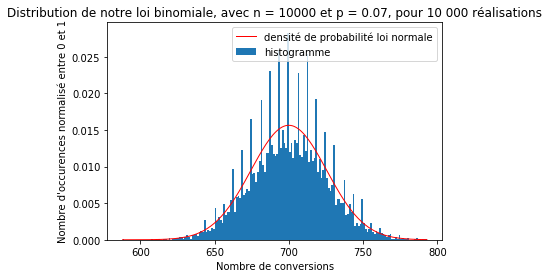


Espérance de la loi binomiale : 700.000000
Écart-type de la loi normale : 25.514702 


In [119]:
#On génère les nombres de conversions obtenus lors de nos 10000 essais
valeurs2 = np.random.binomial(10000,0.07,10000)

#On récupère la moyenne, variance, nombre de valeurs différentes
moyenne2 = np.mean(valeurs2)
variance2 = np.var(valeurs2)
nb_unique_valeurs2 = len(set(valeurs2))

#On représente l'histogramme de notre loi binomiale
count2, bins2, ignored2 = plt.hist(valeurs2, bins = nb_unique_valeurs2, normed = 1, label="histogramme")
plt.title("Distribution de notre loi binomiale, avec n = 10000 et p = 0.07, pour 10 000 réalisations")
plt.xlabel("Nombre de conversions")
plt.ylabel("Nombre d'occurences normalisé entre 0 et 1")

#Moyenne de notre distribution
print("\nLa moyenne du nombre de conversions pour nos 10 000 expériences est de : %(moyenne)f conversions" %{"moyenne":moyenne2})

#Variance de notre distribution
print("La variance de notre distribution est de : %(variance)f" %{"variance" : variance2})

#---------------------------
#Loi normale correspondante

#Calcul de l'espérance de notre loi binomiale précédente : mu = n * p
mu2 = 10000 * 0.07

#Calcul de l'écart type de notre loi binomiale précédente : sigma = sqrt(variance) = sqrt(n*p*(1-p))
sigma2 = math.sqrt(10000 * 0.07 * (1-0.07))

plt.plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ), linewidth=1, color='r', label='densité de probabilité loi normale')
plt.legend()
plt.show()

print("\nEspérance de la loi binomiale : %(esp)f" %{"esp" : mu2})
print("Écart-type de la loi normale : %(sigma)f " %{"sigma" : sigma2})

-----

<p><u>2) Calcul de la probabilité d'obtenir un nombre de conversions <strong>supérieur ou égal à 750</strong> :</u></p>


<p>Cette fois-ci on cherche la probabilité suivante : </p>
\begin{equation*}
P(X\geq 750)
\end{equation*}
<p>Soit le calcul suivant : </p>
\begin{equation*}
P(X \leq 749) = \int_{-\infty}^{749} \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{1}{2}(\frac{x-m}{\sigma})^2) \, \mathrm{d}x \
\end{equation*}
<p>Et toujours : </p>
\begin{equation*}
P(X\geq 750) = 1 - P(X\leq 749)
\end{equation*}
<p><strong>Calculons cette valeur à l'aide de python :</strong></p>

In [114]:
#La probabilité que X<=749
proba2 = scipy.stats.norm.cdf(749,mu2,sigma2)

#Nous trouvons ensuite la valeur désire 1 - P(X<=749)
resultat2 = 1 - proba2
print("La probabilité de trouver un nombre de conversions supérieur ou égal à 750 vaut : %(resultat)f" %{"resultat" : resultat2})
print("Nous avons donc %(pourcentage)f%%  de chance d'obtenir un nombre de conversions supérieur ou égal à 750 !" %{"pourcentage" : resultat2*100})



La probabilité de trouver un nombre de conversions supérieur ou égal à 750 vaut : 0.027400
Nous avons donc 2.739982%  de chance d'obtenir un nombre de conversions supérieur ou égal à 750 !


<p>Cette fois-ci nous avons donc une probabilité d'avoir un taux de conversion réel supérieur à 7.5% de : <strong>2.74%</strong>.</p>
<p>Nous sommes donc <strong>sous la limite</strong> des 5% ! Ce qui signifie maintenant que nous avons un taux de conversion <strong>anormalement élevé</strong>, synonyme potentiellement de l'efficacité d'une nouvelle fonctionnalité.<br/></p>
<p>Ce résultat illustre une <strong>notion importante</strong> ! En effet, pour une <strong>même</strong> technologie, <em>ie</em> un site détenant un taux de conversion de <strong>7%</strong>, le nombre de sessions à considérer est un <strong>facteur clé</strong> quant à la détermination de l'efficience d'une novuelle fonctionnalité. Dans notre premier cas, nous n'avions considérer que <strong>5 000 sessions</strong>, ce qui nous aurait conduit à conclure que la nouvelle fonctionnalité n'était pas efficace si nous n'avions pas essayé avec <strong>10 000 sessions</strong>. Cela aurait conduit potentiellement à une <strong>perte de chiffre d'affaire</strong> suite à une erreur d'analyse ! Il <strong>faut</strong> tenir compte du plein potentiel du site : si l'on considère 5 000 sessions alors que le site possède un nombre moyen de 10 000 sessions, alors on ne réalise pas l'étude statistique sur l'environnement réel.</p>
<p>On pourrait alors se demander jusqu'à quel point peut-on augmenter le nombre de sessions considérées ? Selon moi, il faut considérer le nombre de sessions des <strong>années passées à la même saison</strong> (la demande varie selon les saisons) ainsi que le nombre moyen de sessions des <strong>précédents mois</strong> (pour tenir compte de l'essort du site). On choisira alors un nombre de sessions fidèle aux données récoltées précédemment.</p>


----

<p><strong>Représentation du seuil de significativité statistique sur histogramme (10 000 sessions) : </strong></p>

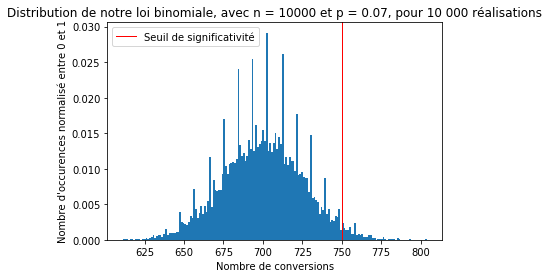

In [107]:
#Représentation de l'histogramme précédent
plt.hist(valeurs2, bins = nb_unique_valeurs2, normed = 1)
plt.title("Distribution de notre loi binomiale, avec n = 10000 et p = 0.07, pour 10 000 réalisations")
plt.xlabel("Nombre de conversions")
plt.ylabel("Nombre d'occurences normalisé entre 0 et 1")

#Représentation du seuil de significativé à 750
plt.axvline(x=750,linewidth=1,color='r', label="Seuil de significativité")

plt.legend()
plt.show()

----

<h3> Réponse à la question initiale :</h3>
<p> On va calculer la probabilité d'avoir un taux de conversions anormalement élevé</p>

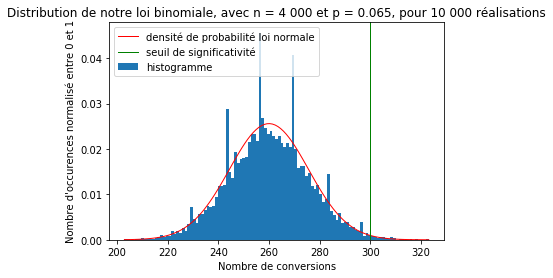


Espérance de la loi binomiale : 260.000000
Écart-type de la loi normale : 15.591664 


In [120]:
#Considérons qu'on réalise 10 000fois l'expérience avec 4 000 utilisateurs et un taux de conversion moyen de 6.5% (cas version B)
#Calculons les valeurs clés du problème
valeurs3 = np.random.binomial(4000,0.065,10000)
moyenne3 = np.mean(valeurs3)
variance3 = np.var(valeurs3)
nb_unique_valeurs3 = len(set(valeurs3))

mu3 = 4000 * 0.065
sigma3 = math.sqrt(mu3*(1-0.065))

#Traçons l'histogramme et la densité de probabilité de la loi normale correspondante
count3, bins3, ignored3 = plt.hist(valeurs3, bins = nb_unique_valeurs3, normed = 1, label="histogramme")
plt.plot(bins3, 1/(sigma3 * np.sqrt(2 * np.pi)) * np.exp( - (bins3 - mu3)**2 / (2 * sigma3**2) ), linewidth=1, color='r', label='densité de probabilité loi normale')
plt.axvline(x=300, color='g', label='seuil de significativité', linewidth=1)
plt.title("Distribution de notre loi binomiale, avec n = 4 000 et p = 0.065, pour 10 000 réalisations")
plt.xlabel("Nombre de conversions")
plt.ylabel("Nombre d'occurences normalisé entre 0 et 1")
plt.legend()
plt.show()

print("\nEspérance de la loi binomiale : %(esp)f" %{"esp" : mu3})
print("Écart-type de la loi normale : %(sigma)f " %{"sigma" : sigma3})

<p>On cherche désormais : </p>
\begin{equation*}
P(X\geq 300) = 1 - P(X\leq 299)
\end{equation*}
<p> avec : </p> 
\begin{equation*}
P(X \leq 299) = \int_{-\infty}^{299} \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{1}{2}(\frac{x-m}{\sigma})^2) \, \mathrm{d}x \
\end{equation*}

In [116]:
#La probabilité que X<=299
proba3 = scipy.stats.norm.cdf(299,mu3,sigma3)

#Nous trouvons ensuite la valeur désire 1 - P(X<=299)
resultat3 = 1 - proba3
print("La probabilité de trouver un nombre de conversions supérieur ou égal à 300 vaut : %(resultat)f" %{"resultat" : resultat3})
print("Nous avons donc %(pourcentage)f%%  de chance d'obtenir un nombre de conversions supérieur ou égal à 300 !" %{"pourcentage" : resultat3*100})




La probabilité de trouver un nombre de conversions supérieur ou égal à 300 vaut : 0.006186
Nous avons donc 0.618628%  de chance d'obtenir un nombre de conversions supérieur ou égal à 300 !


<p>Ainsi, selon la règle de décision vue précédemment, nous pouvons affirmer après analyses statistiques que la différence visible entre les deux versions est <strong>statistiquement significative</strong> !</p> 
<p>La nouvelle version apporte donc un <strong>gain</strong> quant au taux de conversion par rapport à la version originale. Il serait donc judicieux d'implémenter cette nouvelle fonctionnalité sur le site officiel.</p>